In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('../')

from src import model

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Đọc dữ liệu đã qua xử lí.

In [2]:
processed_data = np.genfromtxt(
    '../data/processed/data_processed.csv',
    delimiter=',',
    dtype=str,
    encoding='utf-8'
)

header = processed_data[0]
processed_data = processed_data[1:].astype(float)

print("Data shape:", processed_data.shape)


Data shape: (8443, 10)


In [3]:
X = processed_data[:, 2:]
y = processed_data[:, 0]

y = 1 - y

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Attrited customer:", np.sum(y == 1))
print("Existing customer", np.sum(y == 0))

Shape of X: (8443, 8)
Shape of y: (8443,)
Attrited customer: 7042
Existing customer 1401


# Phân chia tập testing và training (tỉ lệ 20:80)  
Sử dụng tham số stratify=y khi chia để đảm bảo rằng tỷ lệ khách hàng rời bỏ trong cả hai tập huấn luyện và kiểm tra là như nhau. Điều này rất quan trọng đối với các bộ dữ liệu mất cân bằng.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)

Training set: (6754, 8)
Testing set: (1689, 8)


- **Huấn luyện:** Phương thức `fit(X_train, y_train)` được gọi để huấn luyện mô hình. Scikit-learn sẽ tự động thực hiện các thuật toán tối ưu hóa phức tạp bên trong để tìm ra bộ trọng số tốt nhất.  
- **Kiến trúc:** Chúng ta đã xây dựng một lớp Python có tên LogisticRegression chứa các phương thức:
  - `_sigmoid(z)`: Hàm kích hoạt sigmoid, chuyển đổi đầu ra tuyến tính thành xác suất từ 0 đến 1. Phiên bản này đã được tối ưu hóa để ổn định về mặt số học, tránh lỗi overflow.
  - `fit(X, y):` Phương thức huấn luyện, cài đặt thuật toán Gradient Descent. Trong mỗi vòng lặp, nó thực hiện:
    1. Tính toán dự đoán hiện tại.
    2. Tính toán loss.
    3. Tính toán gradients của hàm mất mát theo các trọng số.
    4. Cập nhật các trọng số theo gradient decent.
  - `predict(X)`: Phương thức dự đoán, áp dụng các trọng số đã học được lên dữ liệu mới để đưa ra kết quả cuối cùng (0 hoặc 1).
- **Huấn luyện:** Một đối tượng của lớp LogisticRegression đã được khởi tạo và phương thức `fit(X_train, y_train)` được gọi. Các tham số như `learning_rate` và `n_iterations` đã được lựa chọn để đảm bảo mô hình hội tụ tốt.


In [ ]:
my_model = model.LogisticRegression(learning_rate=0.1, n_iterations=2000)
my_model.fit(X_train, y_train)

y_pred_my_model = my_model.predict(X_test)

Accuracy: 0.8769
Precision: 0.8938
Recall: 0.9674
F1-Score: 0.9291


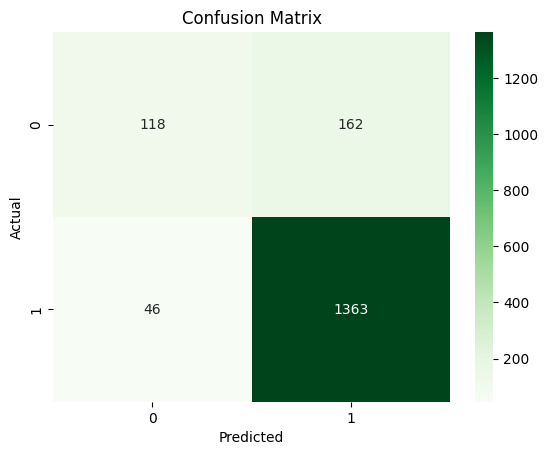

In [6]:
accuracy_my = accuracy_score(y_test, y_pred_my_model)
precision_my = precision_score(y_test, y_pred_my_model)
recall_my = recall_score(y_test, y_pred_my_model)
f1_my = f1_score(y_test, y_pred_my_model)

print(f"Accuracy: {accuracy_my:.4f}")
print(f"Precision: {precision_my:.4f}")
print(f"Recall: {recall_my:.4f}")
print(f"F1-Score: {f1_my:.4f}")

cm_my = confusion_matrix(y_test, y_pred_my_model)
sns.heatmap(cm_my, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Phân tích kết quả:
